In [1]:
# Problem Statement
# Classification using Deep neural network

# Binary classification using Deep Neural Networks 
# Example: Classify movie reviews into positive" reviews and "negative" reviews, 
# just based on the text content of the reviews. Use IMDB dataset.

In [2]:
# The IMDB Dataset
# The IMDB dataset is a set of 50,000 highly polarized reviews from the Internet Movie Database. 
# They are split into 25000 reviews each for training and testing. 
# Each set contains equal number (50%) of positive and negative reviews.

# The IMDB dataset comes packaged with Keras. 
# It consists of reviews and their corresponding labels 
# (0 for negative and 1 for positive review). 
# The reviews are a sequence of words. 
# They come preprocessed as sequence of integers, where each integer stands for a specific word in the dictionary.

# The IMDB datset can be loaded directly from Keras and will usually download about 80 MB on your machine.

In [3]:
# Importing packages

import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics


import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [5]:
# Train data 
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
# Train labels
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [7]:
# Check the first label
train_labels[0]

1

In [8]:
# Since we restricted ourselves to the top 10000 frequent words, no word index should exceed 10000
# we'll verify this below

# Here is a list of maximum indexes in every review --- we search the maximum index in this list of max indexes
print(type([max(sequence) for sequence in train_data]))

# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [9]:
# Let's quickly decode a review

# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
print(len(reverse_word_index))

88584


In [11]:
# Preparing the data

# Vectorize input data
# Input data, which consists of lists of integers representing words in reviews, 
# needs to be converted into tensors suitable for deep neural network input.
# One-hot encoding will be applied to convert these lists into vectors of 0s and 1s.
# Each review's vector will have a dimensionality of 10,000, 
# with 1s at indices corresponding to words present in the review 
# and 0s at indices corresponding to words absent in the review.
# This manual vectorization process will result in tensors of shape (25000, 10000), 
# where 25,000 represents the number of reviews and 10,000 represents the dimensionality of each vector.

# Clarifications
# One-hot encoding is a common technique to represent categorical data, 
# where each category is represented by a binary vector with a length equal to the number of categories. 
# In this case, each word in the vocabulary corresponds to a category.
# The resulting tensors will be quite sparse due to the large number of dimensions, 
# but they are suitable for processing by deep learning models.

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [13]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
X_train.shape

(25000, 10000)

In [15]:
# Vectorizing the labels
Y_train = np.asarray(train_labels).astype('float32')
Y_test  = np.asarray(test_labels).astype('float32')

In [16]:
# Building the network
# Our input data is vectors which needs to be mapped to scaler labels (0s and 1s). 
# This is one of the easiest setups and a simple stack of fully-connected, 
# Dense layers with relu activation perform quite well.

# Hidden layers
# In this network we will leverage hidden layers. we will define our layers as such.
# Dense(16, activation='relu')

# The output from a Dense layer with relu activation is genrated after a chain of tensor operations. 
# This chain of operations is implemented as
# output = relu(dot(W, input) + b)
# Where, W is the Weight matrix and b is the bias (tensor).

# Having 16 hidden units means that the matrix W will be of the shape ( input_Dimension , 16 ). 
# In this case where the dimension of input vector is 10,000; the shape of Weight matrix will be (10000, 16). 
# If you were to represent this network as graph you would see 16 neurons in this hidden layer.

# To put in in laymans terms, there will be 16 balls in this layer.
# Each of these balls, or hidden units is a dimension in the representation space of the layer. 
# Representaion space is the set of all viable representaions for the data. 
# Every hidden layer composed of its hidden units aims to learns one specific transformation of the data, 
# or one feature/pattern from the data.

# Hidden layers, simply put, are layers of mathematical functions each designed to produce an output specific 
# to an intended result. Hidden layers allow for the function of a neural network to be broken down into 
# specific transformations of the data. Each hidden layer function is specialized to produce a defined output.
# For example, a hidden layer functions that are used to identify human eyes and ears may be used in conjunction 
# by subsequent layers to identify faces in images. 
# While the functions to identify eyes alone are not enough to independently recognize objects, 
# they can function jointly within a neural network.

In [17]:
# Model Architecture

# 1. For our model we will use
#     -> two intermediate layers with 16 hidden units each
#     -> Third layer that will output the scalar sentiment prediction
    
# 2. Intermediate layers will use relu activation function. relu or Rectified linear unit function will zero out 
# the negative values.

# 3. Sigmoid activation for the final layer or output layer. A sigmoid function "squashes" arbitary values into the [0,1] range.

# There are formal principles that guide our appraoch in selecting the architectural attributes of a model. 
# These are not covered in this case study.

In [19]:
# Model defination
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
# Compiling the model
# In this step we will choose an optimizer, a loss function, and metrics to observe. We will go forward with

# -> binary_crossentropy loss function, commonly used for Binary Classification
# -> rmsprop optimizer and
# -> accuracy as a measure of performance

# We can pass our choices for optimizer, loss function and metrics as strings to the compile function because rmsprop, 
# binary_crossentropy and accuracy come packaged with Keras.

# model.complie(
#     optimizer='rmsprop',
#     loss = 'binary_crossentropy',
#     metrics = ['accuracy']
# )
# One could use a customized loss function or ortimizer by passing the custom class instance as argument to the loss, 
# optimizer or mertics fields.

# In this example, we will implement our default choices, but, we will do so by passing class instances. 
# This is exactly how we would do it, if we had customized parameters.

In [21]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss = losses.binary_crossentropy,
    metrics = [metrics.binary_accuracy]
)

In [22]:
# Setting up Validation
# We will set aside a part of our training data for validation of the accuracy of the model as it trains. 
# A validation set enables us to monitor the progress of our model on previously unseen data as it goes throug epochs during training.

# Validation steps help us fine tune the training parameters of the model
# .fit function so as to avoid overfitting and under fitting of data.

In [23]:
# # Input for Validation
X_val = X_train[:10000] # first 10,000 for validation
partial_X_train = X_train[10000:] # latter (10001 tp 15K) for partial training

# Labels for validation
Y_val = Y_train[:10000] # first 10,000 for validation
partial_Y_train = Y_train[10000:] # latter (10001 tp 15K) for partial training

In [24]:
# Training our model

# Initially, we will train our models for 20 epochs in mini-batches of 512 samples. 
# We will aslo pass our validation set to the fit method.

# Calling the fit method returns a History object. 
# This object contains a member history which stores all data about the training process including the values of observable 
# or monitored quantaties as the epochs proceed. We will save this object to better determine the fine tuning to be applied to the training step.

In [25]:
history = model.fit(
    partial_X_train,
    partial_Y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, Y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - binary_accuracy: 0.6873 - loss: 0.6025 - val_binary_accuracy: 0.8600 - val_loss: 0.4016
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.8958 - loss: 0.3401 - val_binary_accuracy: 0.8789 - val_loss: 0.3188
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9211 - loss: 0.2445 - val_binary_accuracy: 0.8908 - val_loss: 0.2825
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9378 - loss: 0.1955 - val_binary_accuracy: 0.8893 - val_loss: 0.2756
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9471 - loss: 0.1632 - val_binary_accuracy: 0.8893 - val_loss: 0.2781
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.9561 - loss: 0.1398 - val_binary_accuracy: 0.8852 - val_loss: 0.2923
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.9625 - loss: 0.1190 - val_binary_accuracy: 0.8833 - val_loss: 0.2960
Epoch 8/20
30

In [26]:
# Now that we have trained our network, we will observe its performance metrics stored in the History object.

# Calling the fit method returns a History object. 
# This object has an sttribute history which is a dictionary containing four enteries: one per monitored metric.
history_dict = history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

In [27]:
# history_dict contains values of

# Training loss
# Trainining Accuracy
# Validation Loss
# Validation Accuracy
# at the end of each epoch.

# Let's use Matplotlib to plot Training and validation losses and Traing and Validation Accuracy side by side.

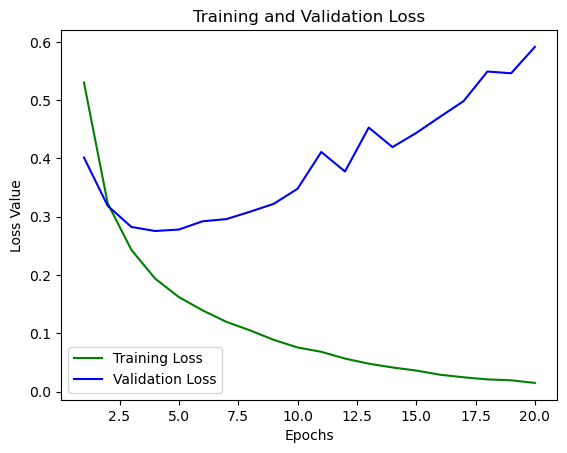

In [28]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

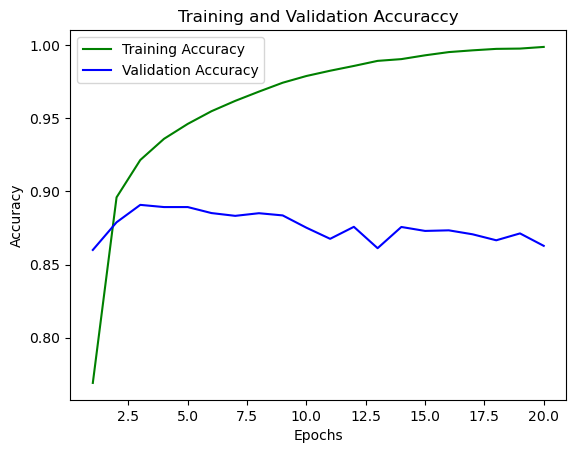

In [29]:
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [30]:
# We observe that minimum validation loss and maximum validation Accuracy is achived at around 3-5 epochs. .

# After that we observe 2 trends:
#     => increase in validation loss and decrese in training loss
#     => decrease in validation accuracy and increase in training accuracy
# This implies that the model is getting better at classifying the sentiment of the training data, 
# but making consistently worse predictions when it encounters new, previously unseed data. 
# This is the hallmark of Overfitting. After the 5th epoch the model begins to fit too closely to the trainning data.

# To address overfitting, we will reduce the number of epochs to somewhere between 3 and 5. 
# These results may vary depending on your machine and due to the very nature of the random assignment of weights 
# that may vary from model to mode.

# In our case we will stop training after 3 epochs.

In [31]:
# Retraining our model

model.fit(
    partial_X_train,
    partial_Y_train,
    epochs=3,
    batch_size=512,
    validation_data=(X_val, Y_val)
)

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - binary_accuracy: 0.9990 - loss: 0.0127 - val_binary_accuracy: 0.8676 - val_loss: 0.5974
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.9985 - loss: 0.0112 - val_binary_accuracy: 0.8679 - val_loss: 0.6180
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.9999 - loss: 0.0066 - val_binary_accuracy: 0.8661 - val_loss: 0.6351


In [32]:
# Model Evaluation

# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [33]:
result

array([[0.00600097],
       [0.9999996 ],
       [0.9710827 ],
       ...,
       [0.0010987 ],
       [0.00676375],
       [0.9467268 ]], dtype=float32)

In [34]:
Y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    Y_pred[i] = np.round(score)

In [35]:
mae = metrics.mean_absolute_error(Y_pred, Y_test)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.14312>